## Newton-Methode

Dies ist eine einfache Visualisierung der Newton-Methode

In [2]:
import numpy as np
%matplotlib inline
import time
import pylab as plt
from IPython import display

### Philips Infiltrationsmodell

In [49]:

P = 31 # Regenrate 
S = 40
f_c = 5.1

def f_philips_infiltration(x):
    ''' 
    Funktion f(x)     
    '''
    return 0.5 * S / np.sqrt(x) + f_c

def fxdx_philips_infiltration(x):
    '''
    Ableitung von f(x)
    '''
    return  0.5 * -0.5 * S / (x ** (3/2))


**Analytische Lösung der Nullstelle:**

In [45]:
t0_ana = ((0.5 * S)/(P -f_c))**2
print(t0_ana)

0.5962940325874689


**Anwendung und Visualisierung der Newton-Methode:**

Die Abbildung wird nach jeden Iterationsschritt aktualisiert, wenn das Skript ausgeführt wird.

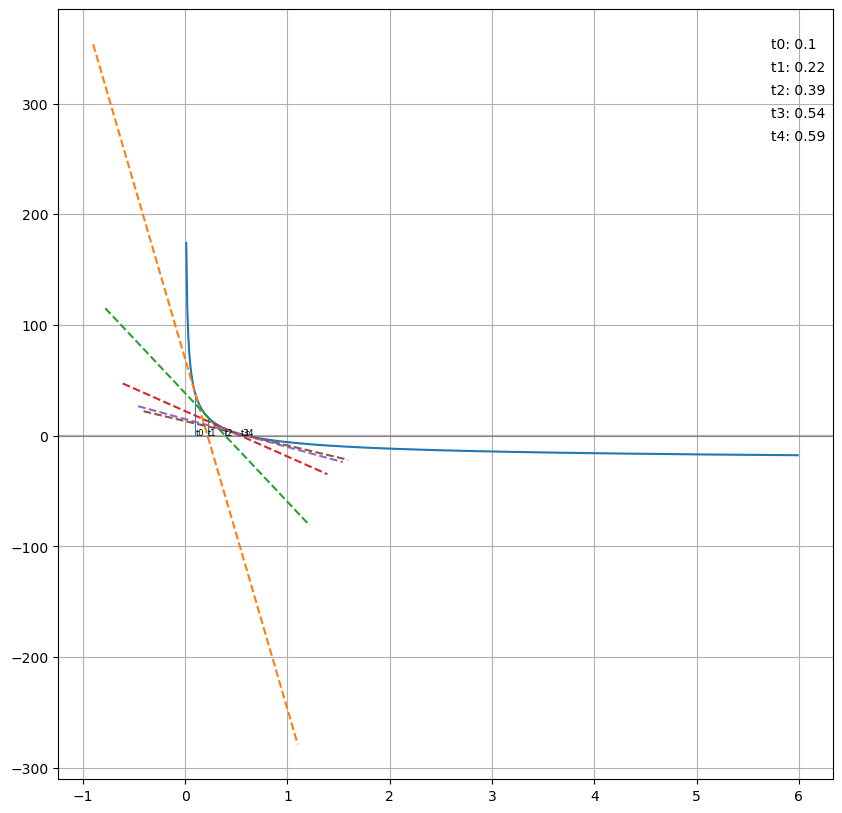

In [66]:
plt.figure(figsize=(10,10))
x = np.arange(0.01,6,0.01) # Wertebereich
t0 = 0.1 # Startwert
tn = t0
n = 5 # Iterationen
plt.plot(x,f_philips_infiltration(x)- P)
plt.grid(True)
plt.axhline(y=0.0, color="#636363", alpha=0.5)
# Loop über die n-Iterationen mit dem Newton-Verfahren
for i in range(n):
    time.sleep(1) # Warte eine Sekunde vor der nächsten Iteration
    xrange = np.linspace(tn-1,tn + 1,20) # Definiere einen Wertebereich um tn für die Darstellung der Tangente
    fx1 = f_philips_infiltration(tn) - P # f(x) at tn
    plt.vlines(tn,ymin=fx1,ymax=0,lw=0.7)
    plt.plot(xrange,fxdx_philips_infiltration(tn)*(xrange- tn) + fx1,ls="--") # Tangente von f(x) bei tn
    plt.annotate("t"+str(i)+": " + str(round(tn,2)),xy=(0.92,0.95-i*0.03),size=10, xycoords='axes fraction')
    plt.text(tn,0,"t"+ str(i),size=6 )

    tn = tn -(fx1/fxdx_philips_infiltration(tn)) # Wende die Newton-Methode an, um Nullstelle zu approximieren
    display.clear_output(wait=True)
    display.display(plt.gcf())
plt.close()

**Aufgabe:** Baue ein if-Statement ein, die die Iterationen abbricht wenn die Nullstellen Appromixation genau genug an der Analytischen Lösung ist (Fehlertoleranz: 0.01). Setze die Anzahl an Iterationen hoch. Nach wie viel Iterationen wird die Nullstelle genau genug durch die Newton-Methode approximiert?

*Tip:* 

```
diff = abs(tn - t0_ana) 
if diff < 0.01: 
    print("Newton-Methode ...")
    break
```

**Beispiel mit anderer Funktion**



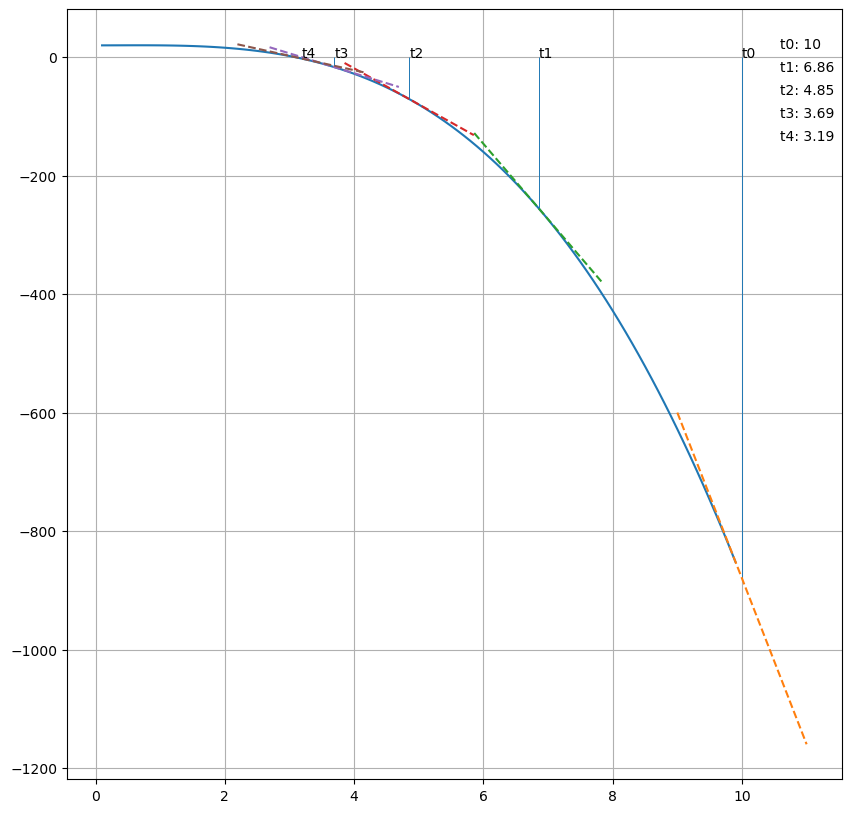

-22.5569963975561
-2.3739721198238826


In [64]:
plt.figure(figsize=(10,10))

def f(x):
    '''
    Funktion f(x)
    '''
    return -x**3 + x **2 +20

def fxdx(x):
    '''
    Ableitung von f(x)
    '''
    return - 3 * x ** 2 + 2 * x  

x = np.arange(0.1,10,0.1) # Wertebereich
t0 = 10 # Startwert
tn = t0 # Setze tn auf Startwert
n = 5 # Anzahl von Iterationen


plt.plot(x,f(x))
plt.grid(True)

for i in range(n):
    xrange = np.linspace(tn-1,tn + 1,20) # Wertebereich um tn
    fx1 = f(tn)
    f_fxdx = (f(tn))/fxdx(tn)
    time.sleep(1)
    plt.vlines(tn,ymin=fx1,ymax=0,lw=0.7)
    plt.plot(xrange,fxdx(tn)*(xrange- tn) + fx1,ls="--")
    plt.annotate("t"+str(i)+": " + str(round(tn,2)),xy=(0.92,0.95-i*0.03),size=10, xycoords='axes fraction')
    plt.text(tn,0,"t"+ str(i) )
    tn = tn -  f_fxdx
    display.clear_output(wait=True)
    display.display(plt.gcf())
    print(fxdx(tn))
    print(fx1)
plt.close()